## Project Title:
Online Shoppers Purchasing Intention Prediction using Machine Learning

## Objective:
The primary objective of this project is to analyze customer browsing behavior on an e-commerce website and build machine learning models to predict whether an online shopper will make a purchase (Revenue = 1) or not (Revenue = 0) during a session.

## Problem Definition:
With the growing importance of e-commerce, understanding user behavior is crucial for increasing conversion rates. This project focuses on:

Exploring session-based user interaction data such as page views, bounce rates, exit rates, time spent, and more.

Preprocessing both numerical and categorical data for model compatibility.

Building classification models (Logistic Regression, K-Nearest Neighbors, and Random Forest) to predict purchase intent.

Evaluating and comparing model performance using metrics like accuracy, confusion matrix, and classification report.

Ultimately, the model can help e-commerce businesses identify potential buyers in real-time and personalize marketing strategies accordingly.



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset from a CSV file into a DataFrame named df.

In [30]:
df = pd.read_csv("/content/online_shoppers_intention.csv")

 Displaying the first 5 rows of the dataset to understand its structure.

In [31]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Checking the number of rows and columns in the dataset.

In [32]:
df.shape

(12330, 18)

Getting a concise summary of the DataFrame including data types and non-null counts.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Checking for missing values in each column.

In [34]:
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Showing summary statistics (like mean, std, min, max) for numerical features.

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Calculating the correlation matrix for numerical features only, excluding categorical and target columns.

In [36]:
cor = df.drop(['Month', 'VisitorType', 'Weekend', 'Revenue'], axis=1).corr()

Plotting a heatmap of the correlation matrix to visualize relationships between numerical features.

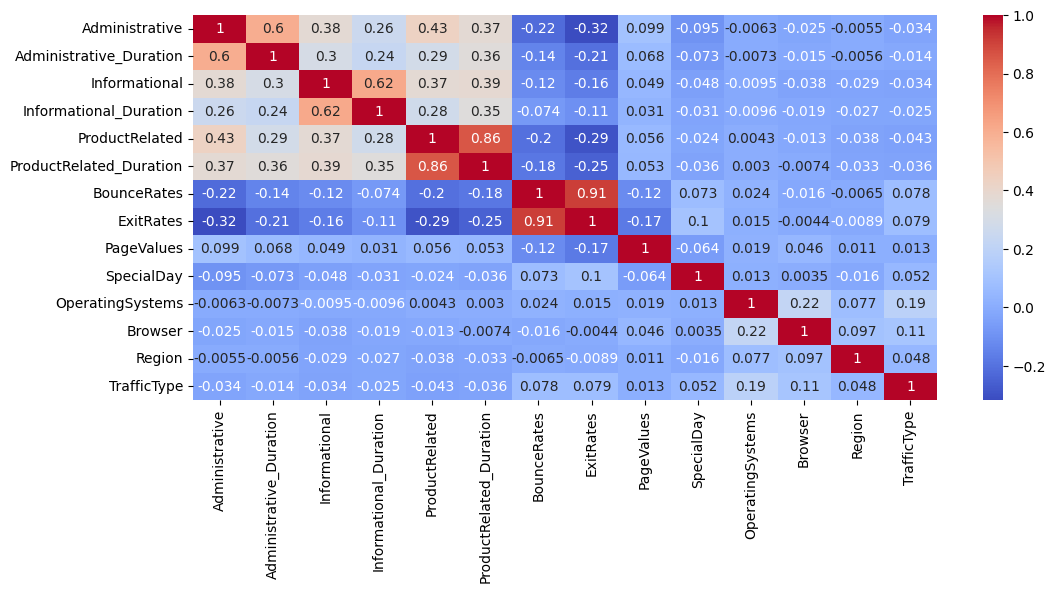

In [37]:
plt.figure(figsize=(12,5))
sns.heatmap(cor,annot=True, cmap='coolwarm')
plt.show()

Encoding categorical columns into numeric values for machine learning use.

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

Plotting revenue over different months to observe trends or seasonality.

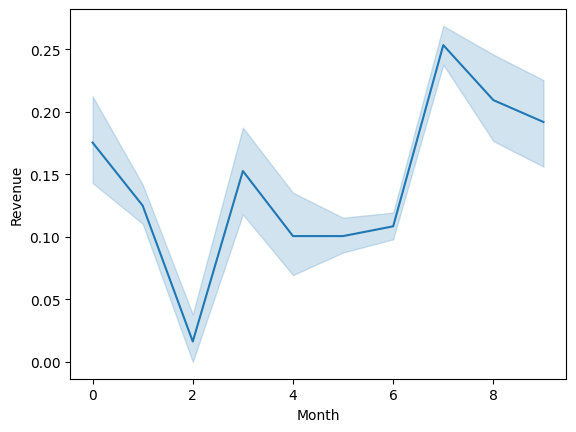

In [39]:
sns.lineplot(x = df['Month'] , y = df['Revenue'])
plt.show()

Separating features (x) and target variable (y).



In [40]:
x = df.drop('Revenue',axis = 1)
y = df['Revenue']

Splitting data into training and testing sets (80/20 split).



In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Standardizing features for better ML model performance.

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

 Training and evaluating a Logistic Regression model.

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
score1 = accuracy_score(y_test, y_pred)
score1*100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


86.7396593673966

Creating a confusion matrix for the Logistic Regression model.

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2011,   44],
       [ 283,  128]])

Printing precision, recall, F1-score of Logistic Regression model.

In [45]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      2055
           1       0.74      0.31      0.44       411

    accuracy                           0.87      2466
   macro avg       0.81      0.65      0.68      2466
weighted avg       0.85      0.87      0.84      2466



Visualizing the confusion matrix with a heatmap.

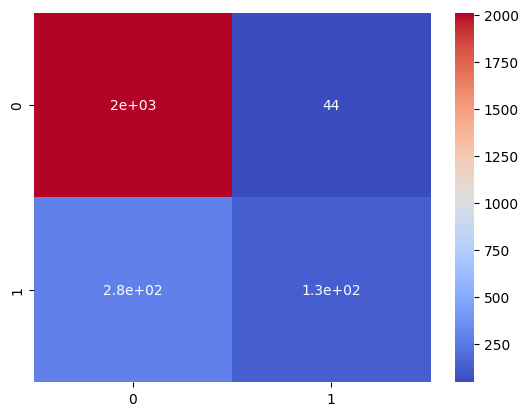

In [46]:
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

Adding synthetic noise features (10 random columns) to test model robustness.

In [47]:
x_train_noice = np.hstack((x_train, np.random.rand(x_train_sc.shape[0],10)))
x_test_noice = np.hstack((x_test, np.random.rand(x_test_sc.shape[0],10)))

 Training and evaluating a K-Nearest Neighbors model with noisy data.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_noice, y_train)
y_pred1 = knn.predict(x_test_noice)
score2 = accuracy_score(y_test, y_pred1)
score2*100

84.99594484995944

Confusion matrix for the KNN model.

In [49]:
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[1985,   70],
       [ 300,  111]])

Classification report for the KNN model.

In [50]:
cr  = classification_report(y_test, y_pred1)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      2055
           1       0.61      0.27      0.38       411

    accuracy                           0.85      2466
   macro avg       0.74      0.62      0.64      2466
weighted avg       0.83      0.85      0.82      2466



Heatmap of KNN confusion matrix.

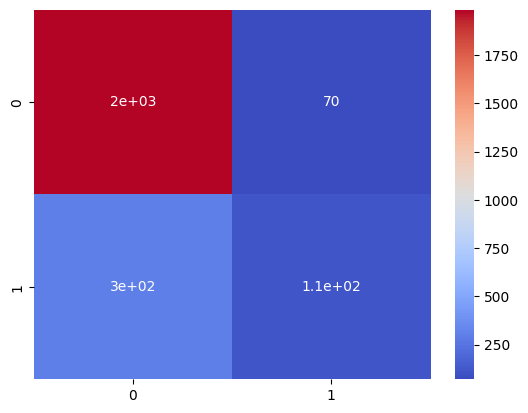

In [51]:
sns.heatmap(cm1, annot=True, cmap='coolwarm')
plt.show()

Training and evaluating a Random Forest Classifier.

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)
score3 = accuracy_score(y_test, y_pred2)
score3*100

89.65936739659367

Confusion matrix for Random Forest.

In [53]:
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[1984,   71],
       [ 184,  227]])

Classification report for Random Forest model.

In [54]:
cr = classification_report(y_test, y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



Heatmap of Random Forest confusion matrix.

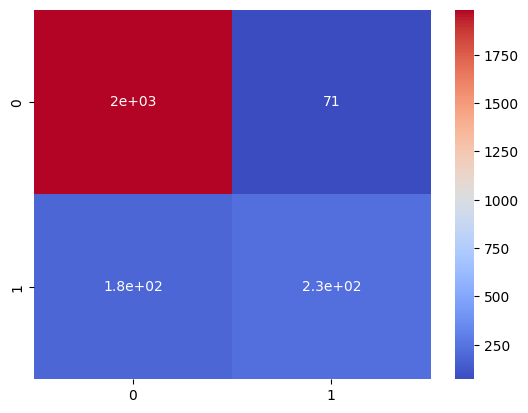

In [55]:
sns.heatmap(cm2, annot=True, cmap='coolwarm')
plt.show()

Comparing accuracies of all three models (Logistic Regression, KNN, Random Forest) in a DataFrame.

In [ ]:
model_results = {
    "Logistic Regression": score1*100,
    "K-Neighbors Classifier": score2*100,
    "Random Forest Classifier": score3*100
}

df_results = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy"])
print(df_results)

                      Model   Accuracy
0       Logistic Regression  86.739659
1    K-Neighbors Classifier  84.995945
2  Random Forest Classifier  89.659367


## Final Conclusion:
Random Forest Classifier outperformed both Logistic Regression and KNN in predicting online shopper purchasing intent.

It proved more robust, accurate, and better suited for non-linear relationships in the dataset.

KNN model performance decreased significantly after adding noise, indicating it’s not noise-resilient.

Logistic Regression, while interpretable and fast, didn’t capture complex patterns well.